# Question: “What is the probability of rolling doubles on your first turn and landing on Boardwalk within your first 10 turns?”

## I will estimate the empirical theoretical This study demonstrates how the multiplication rule can be used to calculate compound probabilities in a game of Monopoly. By separating events into independent parts and multiplying their probabilities, players can better understand the likelihood of specific combined outcomes in chance-based games.

In [12]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
def simulate_monopoly(trials=100):
    successes = 0  # count successful outcomes

    for _ in range(trials):
        # Event A: Roll doubles on the first turn
        die1, die2 = random.randint(1, 6), random.randint(1, 6)
        if die1 != die2:
            continue  # must roll doubles on the first turn

        # Move forward based on the first roll
        position = (die1 + die2) % 40  # Monopoly board has 40 spaces
        landed_boardwalk = False

        # Event B: Check the next 9 turns (for a total of 10 turns)
        for _ in range(9):
            roll = random.randint(1, 6) + random.randint(1, 6)
            position = (position + roll) % 40
            if position == 39:  # Boardwalk is at space #39
                landed_boardwalk = True
                break

        # Success = rolled doubles first turn AND landed on Boardwalk
        if landed_boardwalk:
            successes += 1

    # Estimate probability
    return successes / trials

# Run the simulation for 100 trials
probability_estimate = simulate_monopoly(trials=100)
print(f"Estimated Probability after 100 trials: {probability_estimate:.3f}")

Estimated Probability after 100 trials: 0.020


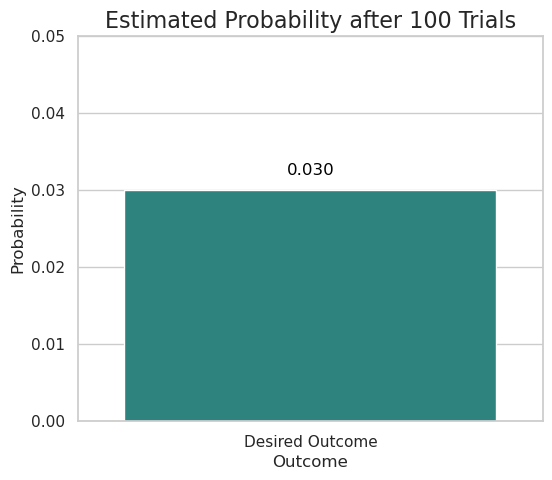

In [14]:
outcome = ['Desired Outcome']
probability = [0.030]

# Create DataFrame
data = pd.DataFrame({
    'Outcome': outcome,
    'Probability': probability
})

# Plot the bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
barplot = sns.barplot(x='Outcome', y='Probability', data=data, palette="viridis")

# Add title and labels
plt.title('Estimated Probability after 100 Trials', fontsize=16)
plt.ylabel('Probability', fontsize=12)

# Show probability on top of the bar
for index, row in data.iterrows():
    barplot.text(index, row.Probability + 0.002, f'{row.Probability:.3f}', color='black', ha="center")

plt.ylim(0, 0.05)  # Set y-axis limit to make the bar more visible
plt.show()

# Conclusion: The probability of rolling doubles on your first turn and reaching Boardwalk within ten turns is about 0.020%,the theoretical probability would be 0.0002% which means the even is very unlikely to happen. 